# Importing required libraries

In [58]:
# standard libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import re
import string
import random
import warnings
warnings.simplefilter('ignore')

# nltk 
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer



# sklearn 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# visualisation
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
%matplotlib inline

In [59]:
from typing import List, Dict

# Loading the dataset

In [60]:
df = pd.read_csv("goodreads_data.csv")
df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


#### from above output we can observe that there is a irrelavant column i.e Unnamed: 0 so we drop

In [61]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [62]:
df.shape

(10000, 7)

### Data Exploration:

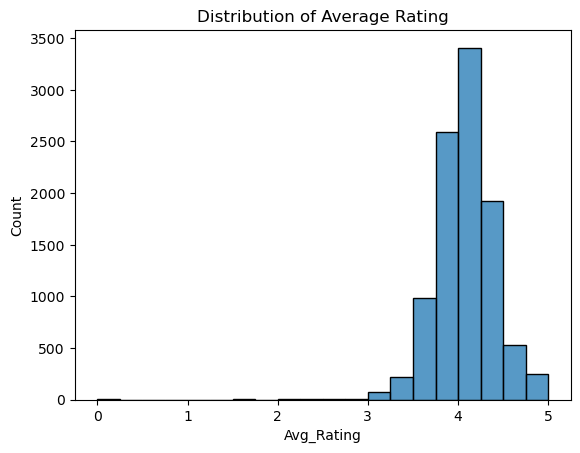

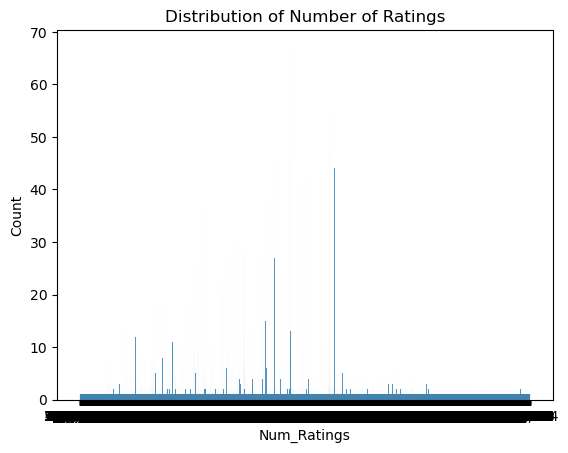

In [6]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Distribution of average rating
# sns.histplot(df['Avg_Rating'], bins=20)
# plt.title('Distribution of Average Rating')
# plt.show()

# # Distribution of number of ratings
# sns.histplot(df['Num_Ratings'], bins=20)
# plt.title('Distribution of Number of Ratings')
# plt.show()


### Correlation Analysis:

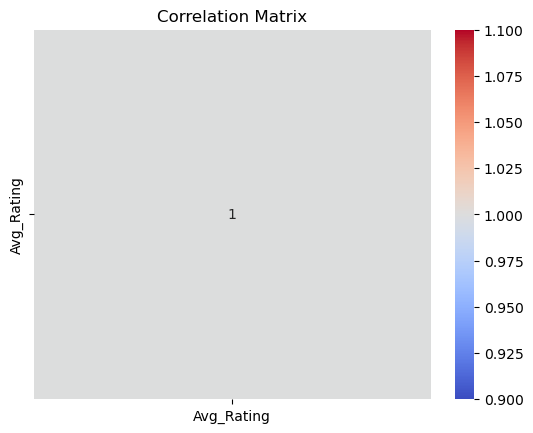

In [7]:
# correlation_matrix = df[['Avg_Rating', 'Num_Ratings']].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()


### Popular Books Analysis:

In [123]:
# popular_books = df.groupby('Book')['Num-Ratings'].sum().sort_values(ascending=False).head(10)
# plt.figure(figsize=(10, 5))
# popular_books.plot(kind='bar')
# plt.title('Top 10 Most Popular Books')
# plt.xlabel('Book')
# plt.ylabel('Total Number of Ratings')
# plt.show()


##### Because of the dataset being so big, we are going to resample only 5000 random songs.

In [63]:
# filter columns

wanted = ['Book', 'Author', 'Description', 'Genres']
df = df[wanted]

In [64]:
# get first n genres from the list
n = 3
df[['Genre1', 'Genre2', 'Genre3', 'Genre4']] = df['Genres'].str.split(',', n, expand=True)

In [65]:
df.head()

,Book,Author,Description,Genres,Genre1,Genre2,Genre3,Genre4
0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",['Classics','Fiction','Historical Fiction',"'School', 'Literature', 'Young Adult', 'Histo..."
1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",['Fantasy','Fiction','Young Adult',"'Magic', 'Childrens', 'Middle Grade', 'Classi..."
2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",['Classics','Fiction','Romance',"'Historical Fiction', 'Literature', 'Historic..."
3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",['Classics','Nonfiction','History',"'Biography', 'Memoir', 'Historical', 'Holocau..."
4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",['Classics','Fiction','Dystopia',"'Fantasy', 'Politics', 'School', 'Literature']"


In [67]:

# from sklearn.feature_extraction.text import TfidfVectorizer


# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform(df['Description'])

In [12]:
# # Combine textual features with numerical features
# features = pd.concat([df[['Avg_Rating', 'Num-Rating']], pd.DataFrame(tfidf_matrix.toarray())], axis=1)

In [68]:
# drop unwanted columns
unwanted = ['Genres', 'Genre4']
df.drop(unwanted, axis=1, inplace=True)

In [69]:
# clean Genres
pattern = r"[a-zA-Z]+"
gen_cols = ['Genre1', 'Genre2', 'Genre3']
for g in gen_cols:
    df[g] = df[g].apply(lambda x: " ".join(re.findall("[a-zA-Z]+", str(x))))

In [70]:
df.sample(2)

,Book,Author,Description,Genre1,Genre2,Genre3
6775,Pre-Suasion: A Revolutionary Way to Influence ...,Robert B. Cialdini,The acclaimed New York Times and Wall Street J...,Psychology,Business,Nonfiction
9729,How to get out of this world alive,Alain Forget,How to Get Out of this World Alive is an uniqu...,Philosophy,Self Help,Nonfiction


In [71]:
# drop NULLs & reset index
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


In [72]:
df.head()

,Book,Author,Description,Genre1,Genre2,Genre3
0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,Classics,Fiction,Historical Fiction
1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,Fantasy,Fiction,Young Adult
2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...",Classics,Fiction,Romance
3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,Classics,Nonfiction,History
4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,Classics,Fiction,Dystopia


#### After that, we use TF-IDF vectorizerthat calculates the TF-IDF score for each book description, word-by-word. 

#### Here, we pay particular attention to the arguments we can specify.

In [73]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english',lowercase = False)

In [74]:
des_matrix = tfidf.fit_transform(df['Description'])[0]
total_words = des_matrix.sum(axis=0) 

#### We now need to calculate the similarity of one book to another. We are going to use cosine similarity.

#### We want to calculate the cosine similarity of each item with every other item in the dataset. So we just pass the des_matrix as argument.

In [75]:
from sklearn.metrics.pairwise import cosine_similarity

In [76]:
cosine_similarities = cosine_similarity(des_matrix) 

##### Once we get the similarities, we'll store in a dictionary the names of the 50 most similar books for each description in our dataset.

In [77]:
similarities = {}

In [78]:
for i in range(len(cosine_similarities)):
    # Now we'll sort each element in cosine_similarities and get the indexes of the books. 
    similar_indices = cosine_similarities[i].argsort()[:-50:-1] 
    # After that, we'll store in similarities each name of the 50 most similar books.
    # Except the first one that is the same book.
    similarities[df['Book'].iloc[i]] = [(cosine_similarities[i][x], df['Book'][x], df['Author'][x]) for x in similar_indices][1:]

In [79]:
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)

In [26]:
#Taking first n records
n = 10
df = df.head(n)

In [27]:
df

,Book,Author,Description,Genre1,Genre2,Genre3
0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,Classics,Fiction,Historical Fiction
1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,Fantasy,Fiction,Young Adult
2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...",Classics,Fiction,Romance
3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,Classics,Nonfiction,History
4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,Classics,Fiction,Dystopia
5,The Little Prince,Antoine de Saint-Exupéry,A pilot stranded in the desert awakes one morn...,Classics,Fiction,Fantasy
6,1984,George Orwell,The new novel by George Orwell is the major wo...,Classics,Fiction,Science Fiction
7,The Great Gatsby,F. Scott Fitzgerald,Alternate Cover Edition ISBN: 0743273567 (ISBN...,Classics,Fiction,School
8,The Catcher in the Rye,J.D. Salinger,It's Christmas time and Holden Caulfield has j...,Classics,Fiction,Young Adult
9,The Lord of the Rings,J.R.R. Tolkien,"One Ring to rule them all, One Ring to find th...",Fantasy,Classics,Fiction


# Text Preprocessing


In [80]:
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)


In [81]:
# Function for converting into lower case
def make_lower_case(text):
    return text.lower()

In [82]:
# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [83]:
# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

In [84]:
# Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [87]:
from nltk.corpus import stopwords

In [88]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [89]:
# Applying all the functions in description and storing as a cleaned_des

df['cleaned_Des'] = df['Description'].apply(_removeNonAscii)
df['cleaned_Des'] = df.cleaned_Des.apply(func =make_lower_case)
# df['cleaned_Des'] = df.cleaned_Des.apply(func =remove_stop_words)
df['cleaned_Des'] = df.cleaned_Des.apply(func=remove_punctuation)
df['cleaned_Des'] = df.cleaned_Des.apply(func=remove_html)


In [90]:
df.sample(6)

,Book,Author,Description,Genre1,Genre2,Genre3,cleaned_Des
3405,Unless,Carol Shields,"Reta Winters, 44-year-old successful author of...",Fiction,Canada,Literary Fiction,reta winters 44 year old successful author of ...
230,The Wind in the Willows,Kenneth Grahame,"\n“All this he saw, for one moment breathless ...",Fiction,Fantasy,Childrens,all this he saw for one moment breathless and ...
4985,"The Blue Sword (Damar, #1)",Robin McKinley,"This is the story of Corlath, golden-eyed king...",Fantasy,Young Adult,Fiction,this is the story of corlath golden eyed king ...
7684,The Folk of the Faraway Tree (The Faraway Tree...,Enid Blyton,"""A land at the top of a tree!"" said Connie. ""I...",Fantasy,Childrens,Classics,a land at the top of a tree said connie i don ...
8002,A Pale View of Hills,Kazuo Ishiguro,Librarian note: This a previously-published ed...,Fiction,Japan,Historical Fiction,librarian note this a previously published edi...
693,Papillon,Henri Charrière,"Henri Charrière, called ""Papillon,"" for the bu...",Nonfiction,Biography,Classics,henri charrire called papillon for the butterf...


### Text Data Analysis:

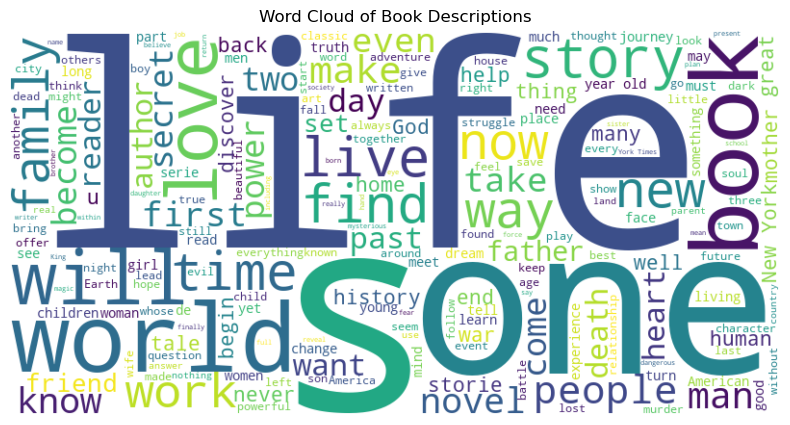

In [93]:
from wordcloud import WordCloud

# Combine all descriptions into a single text
all_descriptions = ' '.join(df['Description'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Book Descriptions')
plt.show()


### Genre Analysis:

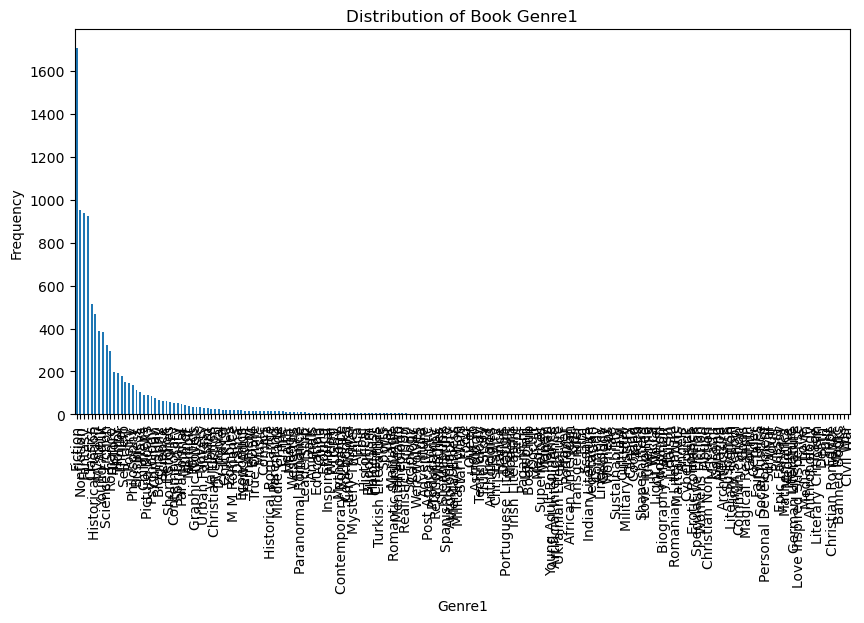

In [95]:
genre_counts = df['Genre1'].value_counts()
plt.figure(figsize=(10, 5))
genre_counts.plot(kind='bar')
plt.title('Distribution of Book Genre1')
plt.xlabel('Genre1')
plt.ylabel('Frequency')
plt.show()


##### We can use that similarity scores to access the most similar items and give a recommendation.

##### For that, we'll define our Content based recommender class.

In [124]:
class ContentBasedBookRecommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix

    def _print_message(self, Book, recom_book):
        pub_items = len(recom_book)
        
        print(f'The {pub_items} recommended books for {book} are:')
        for i in range(pub_items):
            print(f"Number {i+1}:")
            print(f"{recom_book[i][1]} by {recom_book[i][2]} with {round(recom_book[i][0], 3)} similarity score") 
            print("--------------------")
        
    def recommend(self, recommendation):
        # Get book to find recommendations for
        Book = recommendation['book']
        # Get number of books to recommend
        number_books = recommendation['number_books']
        # Get the number of books most similars from matrix similarities
        recom_book = self.matrix_similar[Book][:number_books]
        # print each item
        self._print_message(Book=book, recom_book=recom_book)

In [125]:
recommedations = ContentBasedBookRecommender(similarities)

In [130]:
recommendation = {
    "book": df['Book'].iloc[8], 
    "number_books": 4 
}

In [131]:
# recommedations.recommend(recommendation)

KeyError: 'The Catcher in the Rye'

In [135]:
def recommend(title, genre):
    # Matching the genre with the dataset and reset the index
    temp = df[(df['Genre1'] == genre) | (df['Genre2'] == genre) | (df['Genre3'] == genre)]  
    temp.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(temp.index, index = temp['Book'])
    
    #Converting the book title into vectors 
    tf = TfidfVectorizer(analyzer='word', min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(temp['Book'])
    
    # Calculating the similarity measures based on Cosine Similarity
    cs = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
    idx = indices[title]
    
    # Get the pairwsie similarity scores 
    sig = list(enumerate(cs[idx]))
    
    # Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
    
    # Scores of the 5 most similar books 
    sig = sig[1:6]
    
    # Book indicies
    book_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = temp[['Book']].iloc[book_indices]
    print(f"People who read \'{title}\' might also like: {', '.join(i for i in rec['Book']) }")

# try
# recommend("The Trojan Women", "Drama")


### Author Clustering


In [112]:
# Convert the book descriptions into TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Description'])


In [113]:
from sklearn.cluster import KMeans

In [114]:
# Compute K-Means clustering
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(tfidf_matrix)


KMeans(n_clusters=5, n_init=10)

In [115]:

# Add cluster number to the original dataframe
df['Cluster'] = kmeans.labels_

In [116]:
print(df.groupby('Cluster')['Author'].nunique())

Cluster
0      71
1    1618
2    1215
3    1728
4    2276
Name: Author, dtype: int64


### Visualisation

In [48]:
from wordcloud import WordCloud

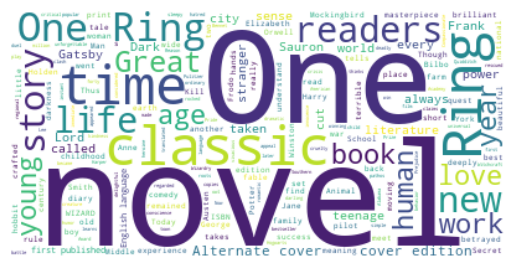

In [49]:
# Generate a word cloud for book descriptions
text = ' '.join(description for description in df['Description'])
wordcloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


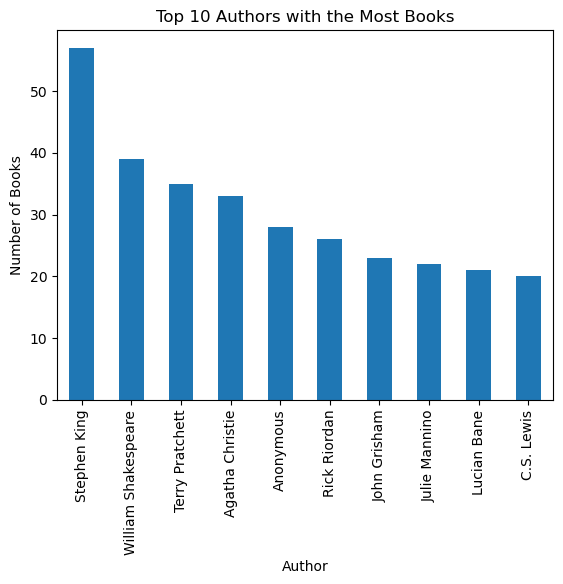

In [109]:
# Author Distribution
df['Author'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title('Top 10 Authors with the Most Books')
plt.show()

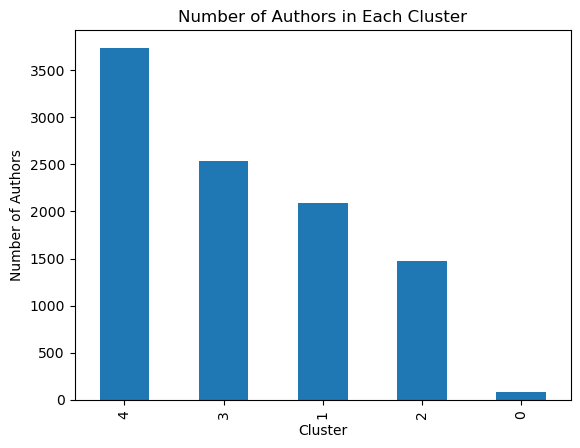

In [117]:
# Cluster Size Distribution
df['Cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Authors')
plt.title('Number of Authors in Each Cluster')
plt.show()
